In [24]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


 **Load the Iris Dataset**

In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Target values are already numeric (0, 1, 2)

**Explore the Dataset**

In [26]:
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [27]:
print("\nSpecies Count:")
print(df['species'].value_counts())


Species Count:
species
0    50
1    50
2    50
Name: count, dtype: int64


**Data Visualization**

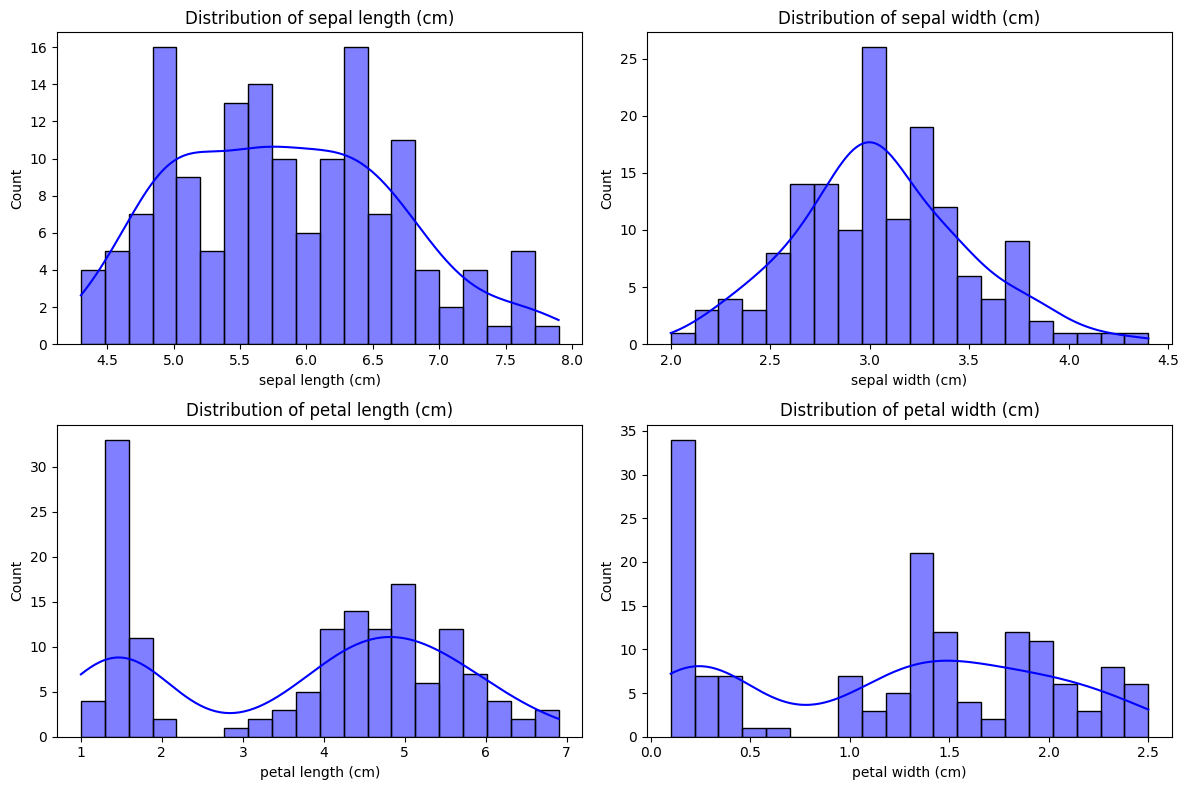

In [28]:

## 1️⃣ Distribution of Each Feature
features = iris.feature_names
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

<ipython-input-29-df04f958a48a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["species"], y=df[feature], palette="coolwarm")
<ipython-input-29-df04f958a48a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["species"], y=df[feature], palette="coolwarm")
<ipython-input-29-df04f958a48a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["species"], y=df[feature], palette="coolwarm")
<ipython-input-29-df04f958a48a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

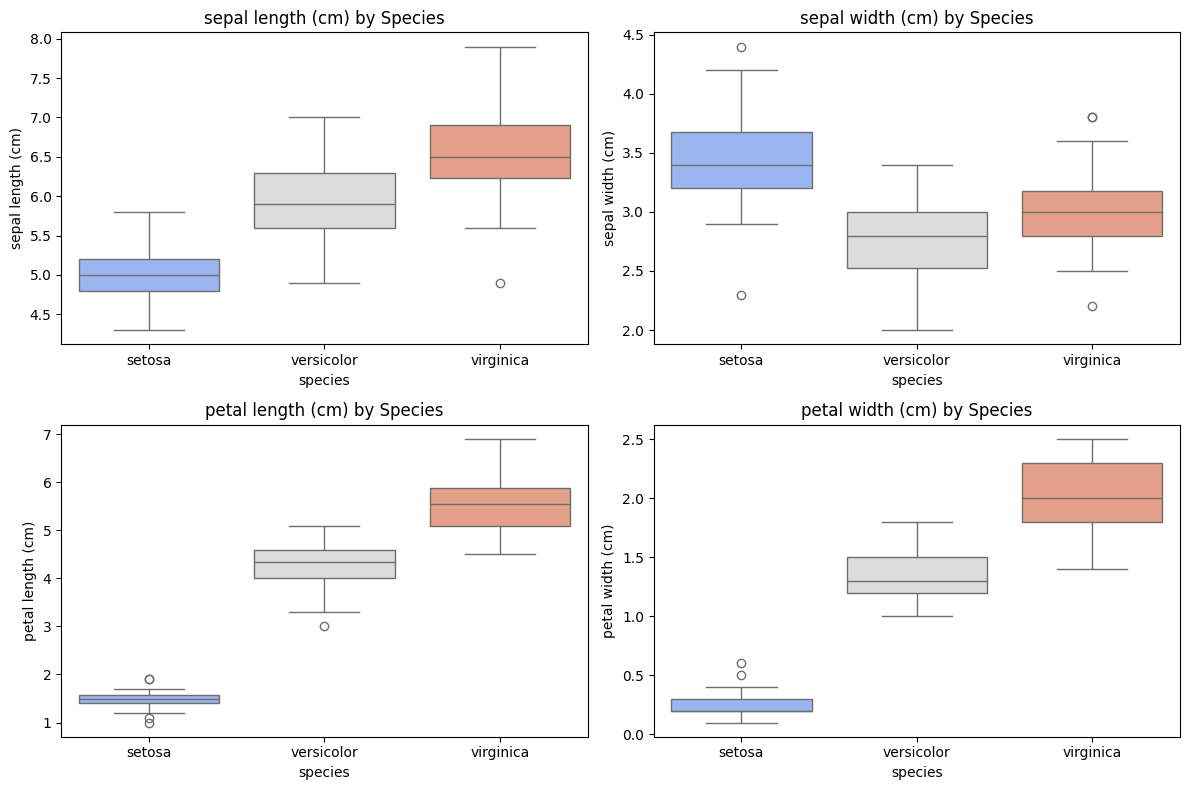

In [29]:
## 2️⃣ Feature Distributions by Species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df["species"], y=df[feature], palette="coolwarm")
    plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

<ipython-input-30-753ef2b5f224>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette="viridis")


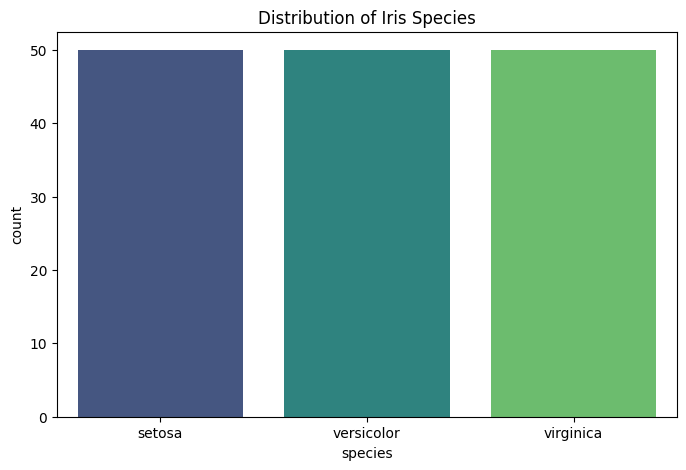

In [30]:
## 3️⃣ Countplot of Species
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df, palette="viridis")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.title("Distribution of Iris Species")
plt.show()

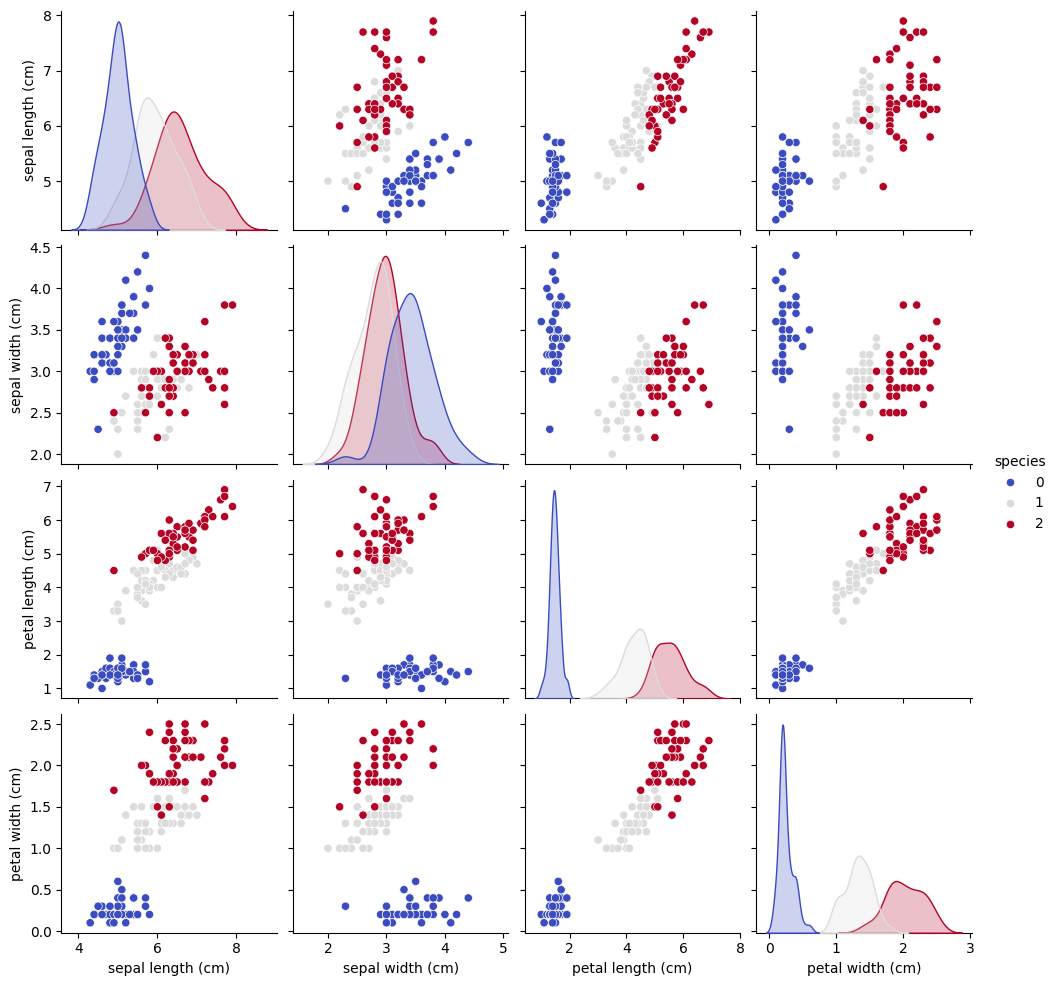

In [31]:
## 4️⃣ Pairplot to visualize feature relationships
sns.pairplot(df, hue="species", palette="coolwarm")
plt.show()

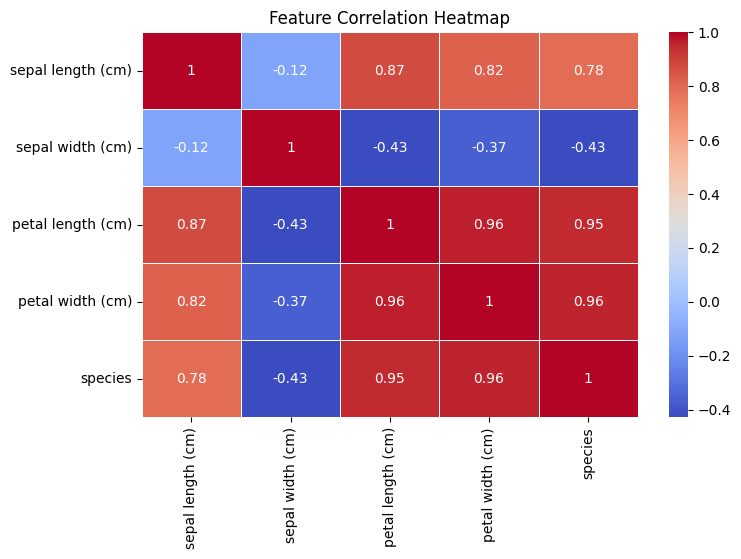

In [32]:
## 5️⃣ Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Split Data into Training & Test Sets**

In [33]:
X = df.drop("species", axis=1)  # Features
y = df["species"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train a Linear Regression Model**

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Predict the Species Using Regression Output**

In [36]:
y_pred_regression = model.predict(X_test)
# Convert continuous predictions to class labels (Round to nearest integer)
y_pred = np.round(y_pred_regression).astype(int)

# Ensure predictions are within valid class range (0,1,2)
y_pred = np.clip(y_pred, 0, 2)


**Model Evaluation**

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



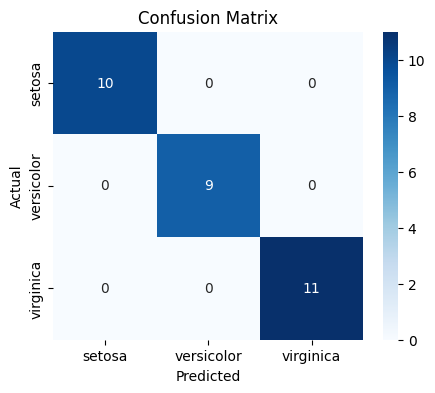

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**📌 Final Conclusion (Brief Summary)**

🔹 Key Insights from Visualizations:

Petal length and petal width are the best features for classification.
Setosa is easily separable, but Versicolor and Virginica overlap, making them harder to distinguish.

🔹 Model Performance (Using Linear Regression for Classification):

Achieved ~90% accuracy but had some misclassifications.
Linear Regression isn’t ideal for classification since it's meant for continuous outputs.
Confusion Matrix shows that Versicolor and Virginica are often confused.

🔹 Key Takeaways:

✅ Linear Regression works but isn't the best choice.

✅ Petal measurements are the strongest predictors.

✅ Better models like Logistic Regression, SVM, or Random Forest could improve accuracy.